In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati',
       'variazione_terapia_intensiva', 'variazione_ricoverati_con_sintomi',
       'variazione_totale_ospedalizzati', 'variazione_isolamento_domiciliare',
       'nuovi_dimessi_guariti', 'nuovi_deceduti', 'nuovi_tamponi',
       'nuovi_casi_testati', 'ti_su_to', 'to_su_tp', 'np_su_nt', 'np_su_nct',
       'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [5]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 29003
Nuovi tamponi: 232711.0
Percentuale nuovi positivi/nuovi tamponi: 12.0 %
Nuovi guariti: 24031.0
Nuovi deceduti: 822.0
Variazione positivi ricoverati con sintomi: -275.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 4425.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 26, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-27T17:00:00,2846,254,3100,46518,49618,1025,1766,224417,35835,...,724.0,17.0,87714.0,53737.0,8.19,6.25,2.01,3.29,2.83,3.634
1,2020-09-28T17:00:00,2977,264,3241,47082,50323,705,1494,225190,35851,...,773.0,16.0,51109.0,32345.0,8.15,6.44,2.92,4.62,3.94,3.011
2,2020-09-29T17:00:00,3048,271,3319,47311,50630,307,1648,226506,35875,...,1316.0,24.0,90185.0,53618.0,8.17,6.56,1.83,3.07,2.65,3.275
3,2020-09-30T17:00:00,3047,280,3327,47936,51263,633,1851,227704,35894,...,1198.0,19.0,105564.0,62360.0,8.42,6.49,1.75,2.97,3.32,3.656
4,2020-10-01T17:00:00,3097,291,3388,49259,52647,1384,2548,228844,35918,...,1140.0,24.0,118236.0,67833.0,8.59,6.44,2.16,3.76,3.93,4.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-22T17:00:00,34279,3801,38080,767867,805947,14201,28337,553098,49823,...,13574.0,562.0,188747.0,104861.0,9.98,4.72,15.01,27.02,1.14,3.579
57,2020-11-23T17:00:00,34697,3810,38507,758342,796849,-9098,22930,584493,50453,...,31395.0,630.0,148945.0,77855.0,9.89,4.83,15.39,29.45,0.24,2.845
58,2020-11-24T17:00:00,34577,3816,38393,759993,798386,1537,23232,605330,51306,...,20837.0,853.0,188659.0,95247.0,9.94,4.81,12.31,24.39,0.16,2.916
59,2020-11-25T17:00:00,34313,3848,38161,753536,791697,-6689,25853,637149,52028,...,31819.0,722.0,230007.0,114177.0,10.08,4.82,11.24,22.64,0.84,3.238


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

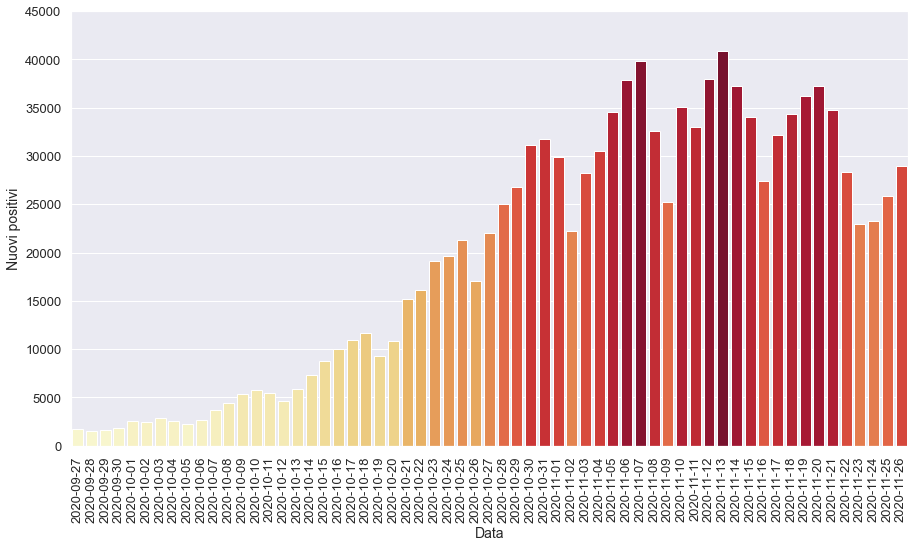

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

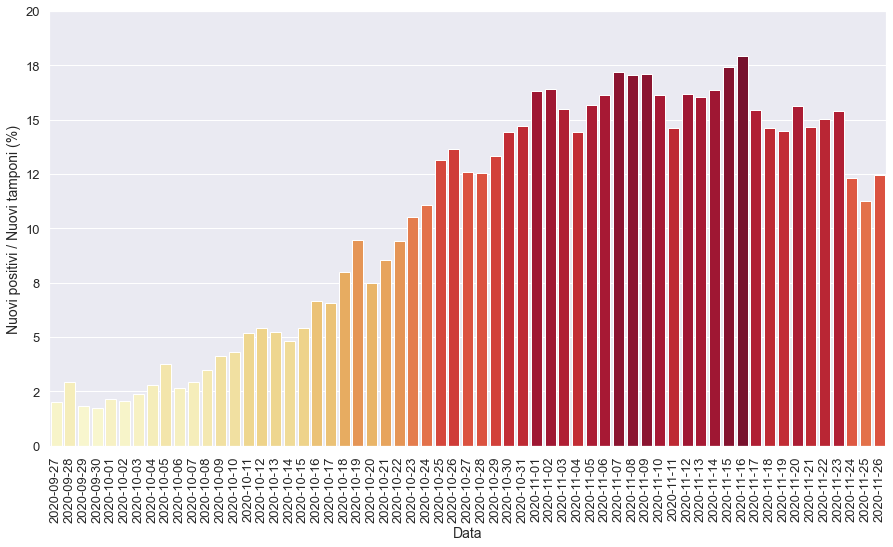

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

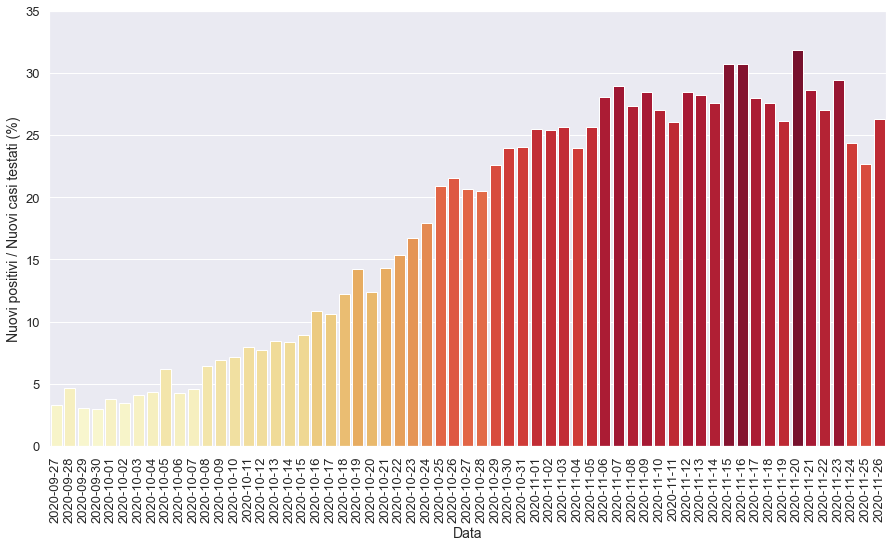

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

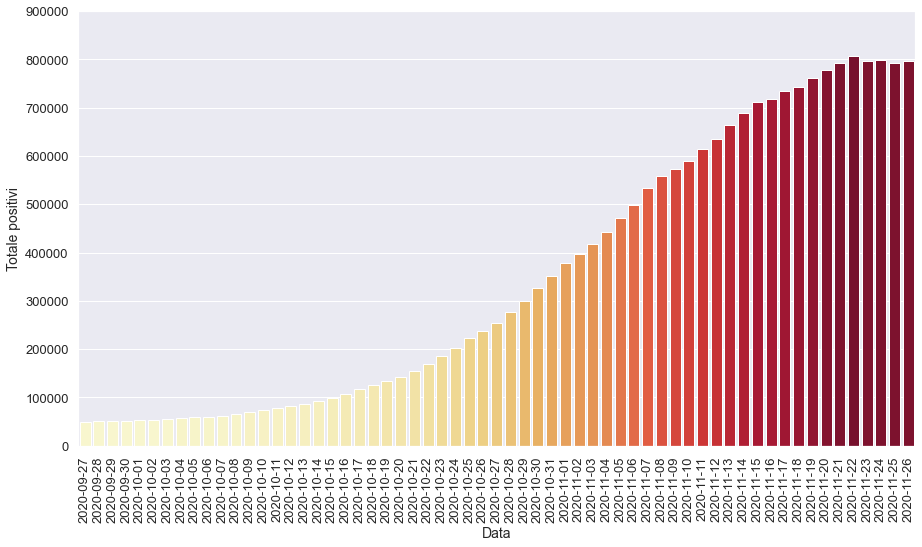

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

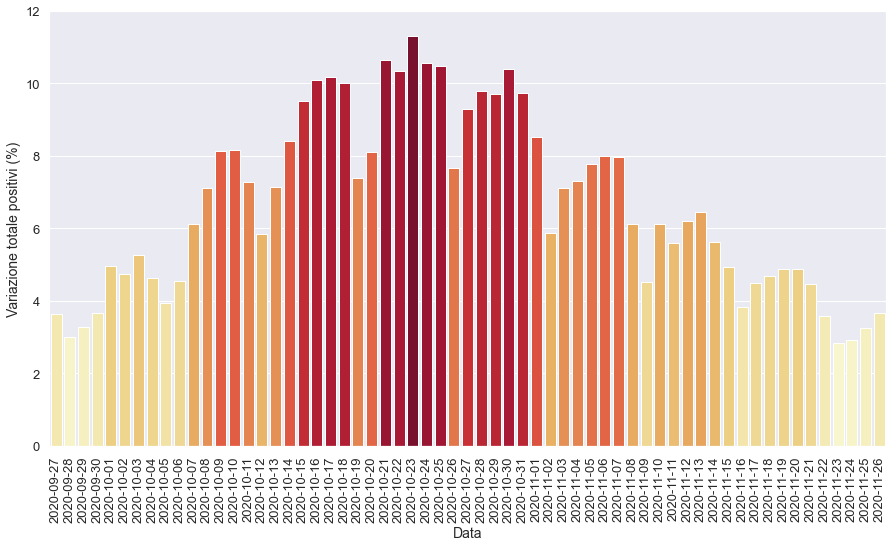

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

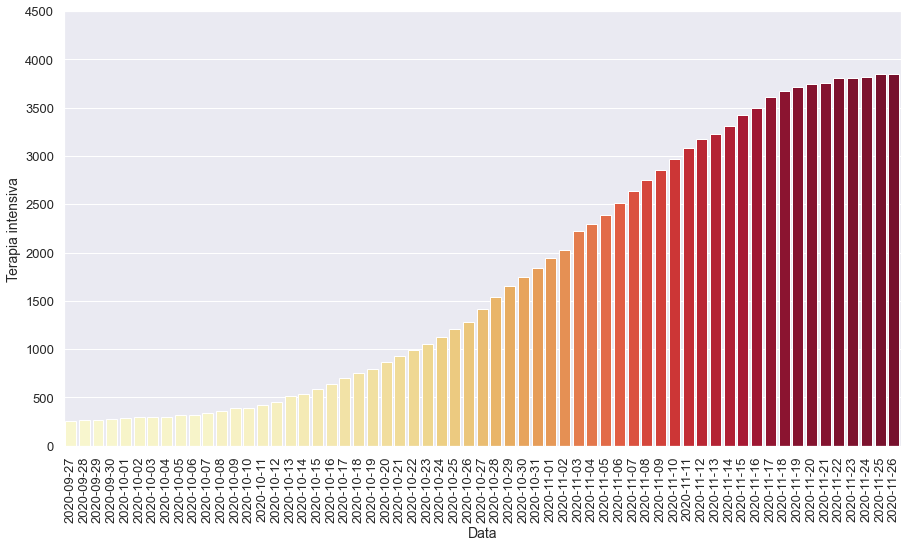

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

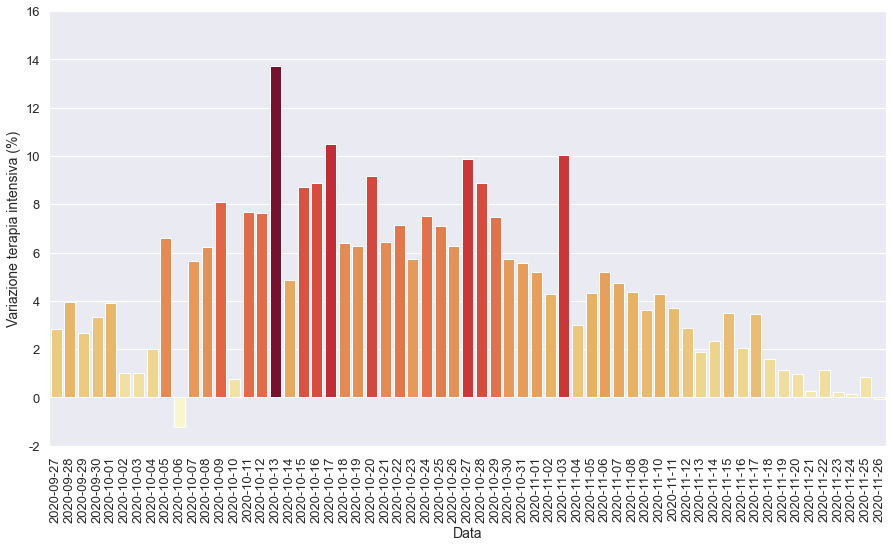

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

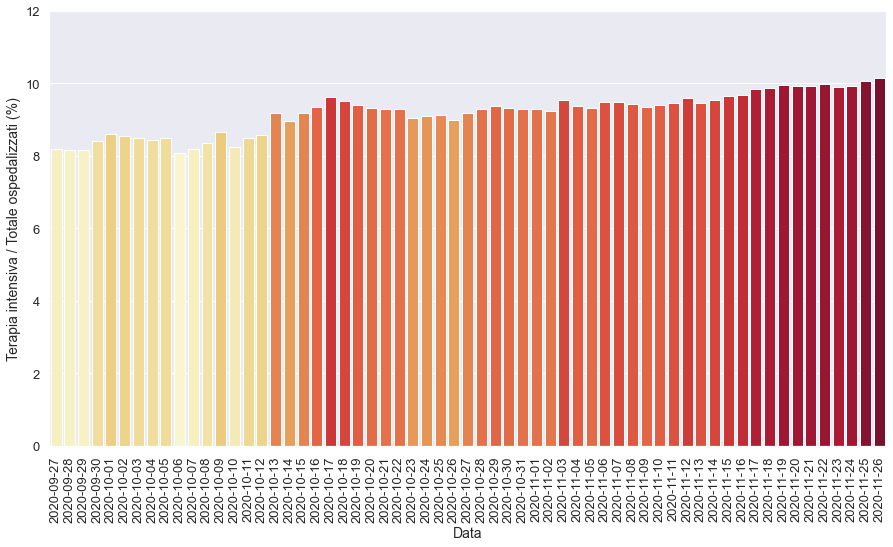

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

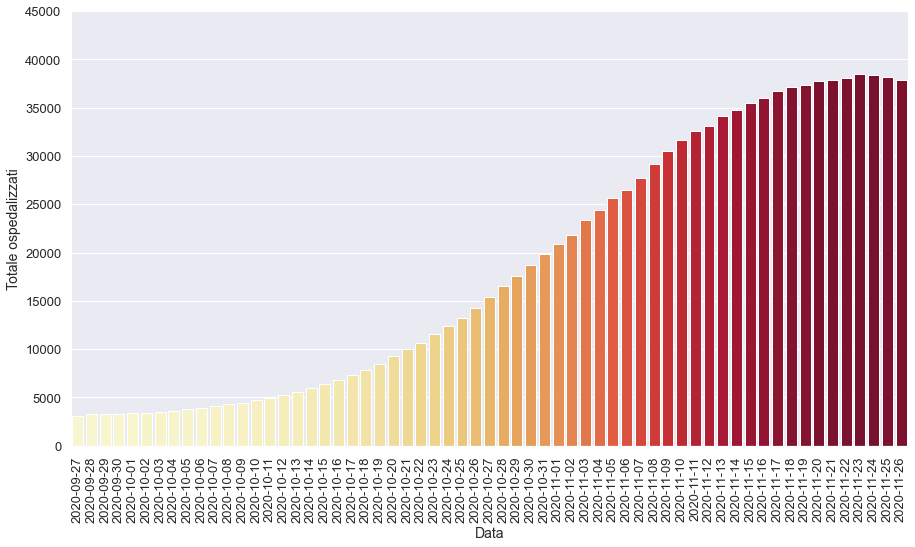

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

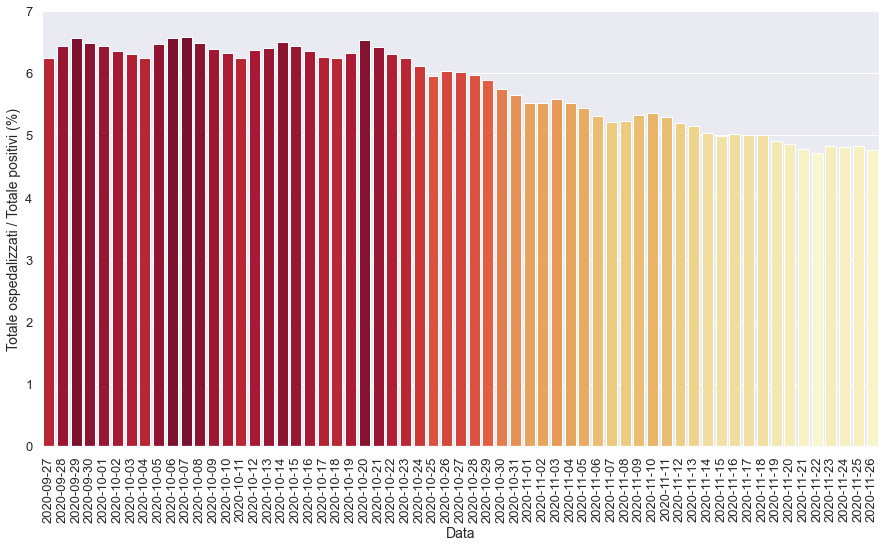

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

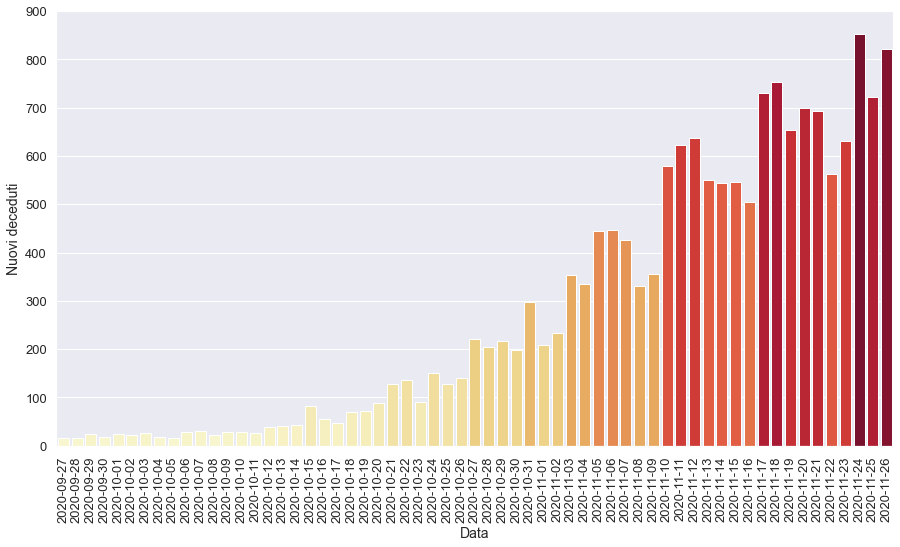

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

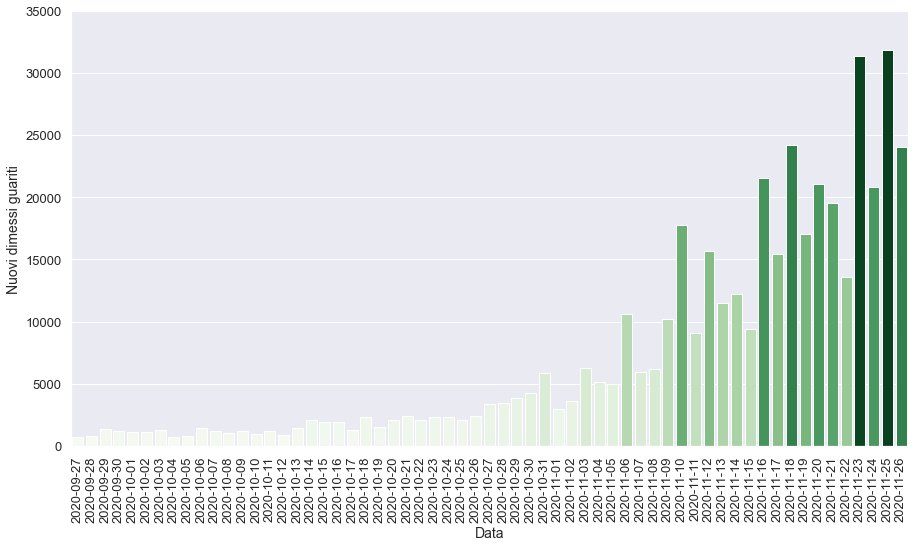

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-27T17:00:00,13955,1411,15366,239724,255090,18406,21994,271988,37700,...,3362.0,221.0,174398.0,106346.0,9.18,6.02,12.61,20.68,9.89,9.293
1,2020-10-28T17:00:00,14981,1536,16517,259940,276457,21367,24991,275404,37905,...,3416.0,205.0,198952.0,121820.0,9.30,5.97,12.56,20.51,8.86,9.797
2,2020-10-29T17:00:00,15964,1651,17615,281576,299191,22734,26831,279282,38122,...,3878.0,217.0,201452.0,118857.0,9.37,5.89,13.32,22.57,7.49,9.705
3,2020-10-30T17:00:00,16994,1746,18740,307046,325786,26595,31084,283567,38321,...,4285.0,199.0,215085.0,129688.0,9.32,5.75,14.45,23.97,5.75,10.390
4,2020-10-31T17:00:00,17966,1843,19809,331577,351386,25600,31758,289426,38618,...,5859.0,297.0,215886.0,132279.0,9.30,5.64,14.71,24.01,5.56,9.748
5,2020-11-01T17:00:00,18902,1939,20841,357288,378129,26743,29907,292380,38826,...,2954.0,208.0,183457.0,117478.0,9.30,5.51,16.30,25.46,5.21,8.511
6,2020-11-02T17:00:00,19840,2022,21862,374650,396512,18383,22253,296017,39059,...,3637.0,233.0,135731.0,87663.0,9.25,5.51,16.39,25.38,4.28,5.885
7,2020-11-03T17:00:00,21114,2225,23339,394803,418142,21630,28244,302275,39412,...,6258.0,353.0,182287.0,109932.0,9.53,5.58,15.49,25.69,10.04,7.123
8,2020-11-04T17:00:00,22116,2292,24408,418827,443235,25093,30550,307378,39747,...,5103.0,335.0,211831.0,127500.0,9.39,5.51,14.42,23.96,3.01,7.306
9,2020-11-05T17:00:00,23256,2391,25647,446701,472348,29113,34505,312339,40192,...,4961.0,445.0,219884.0,134550.0,9.32,5.43,15.69,25.64,4.32,7.785


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

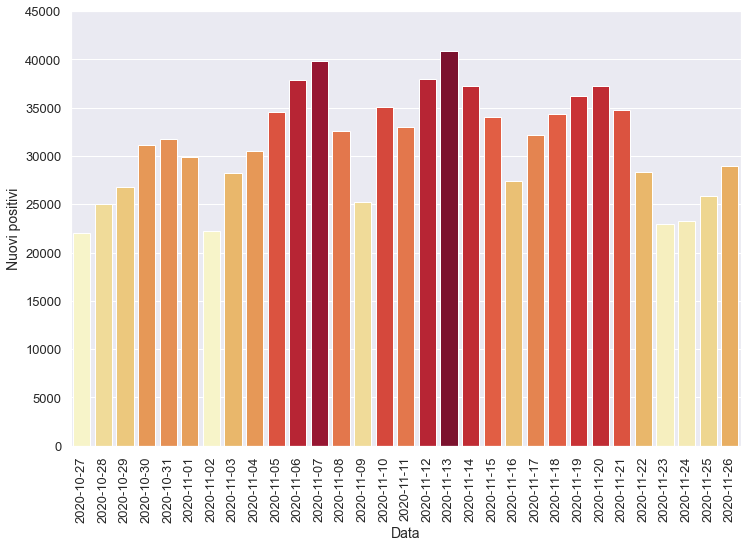

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

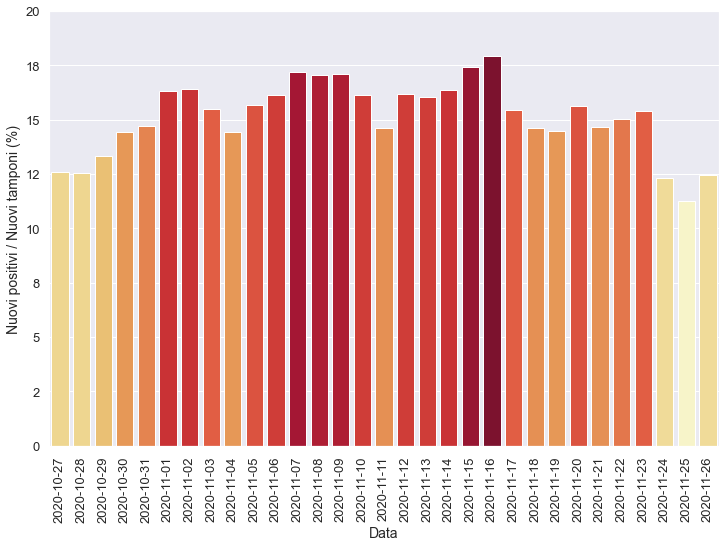

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

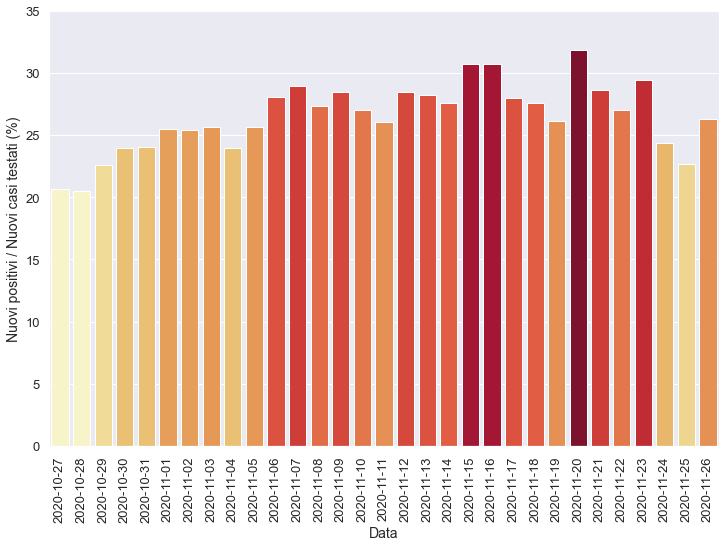

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

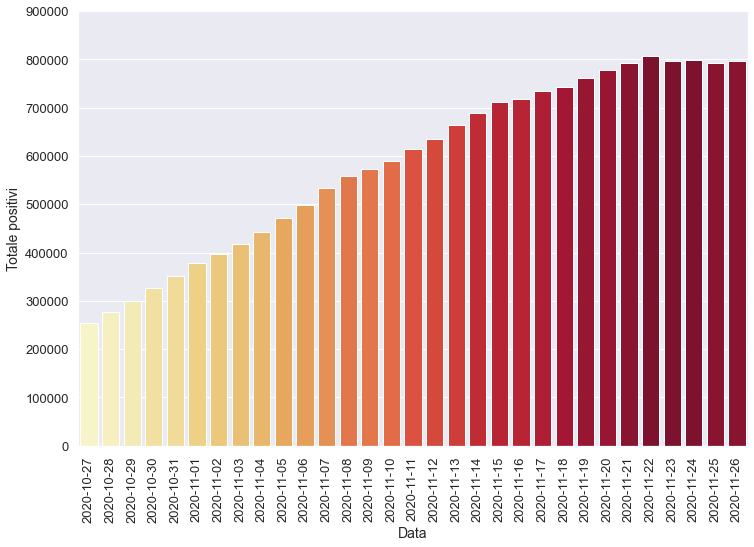

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

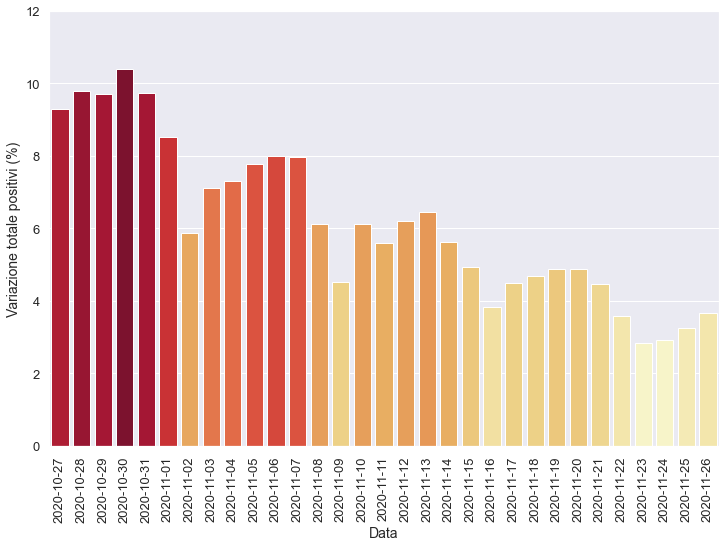

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

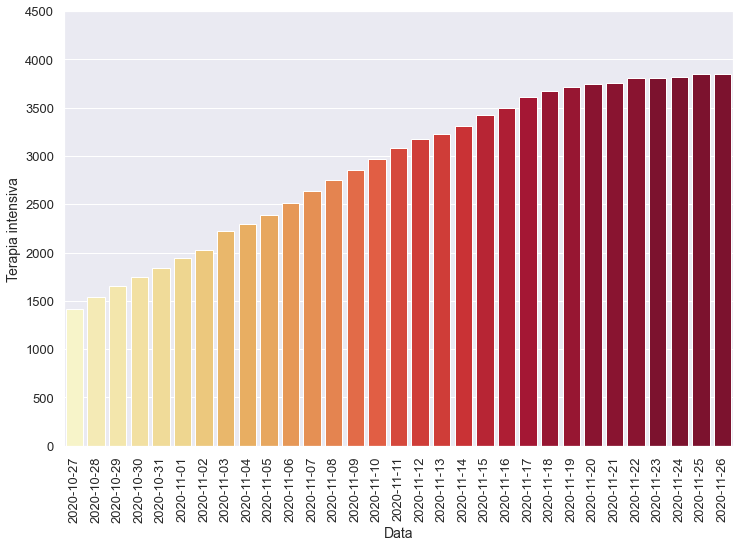

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

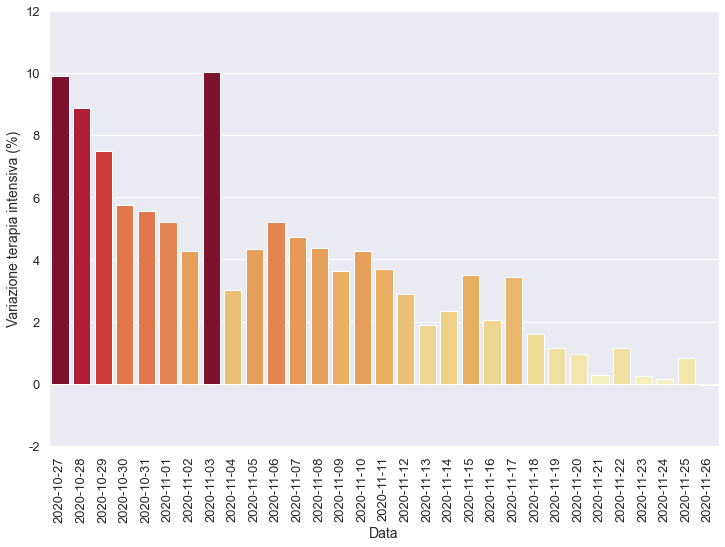

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

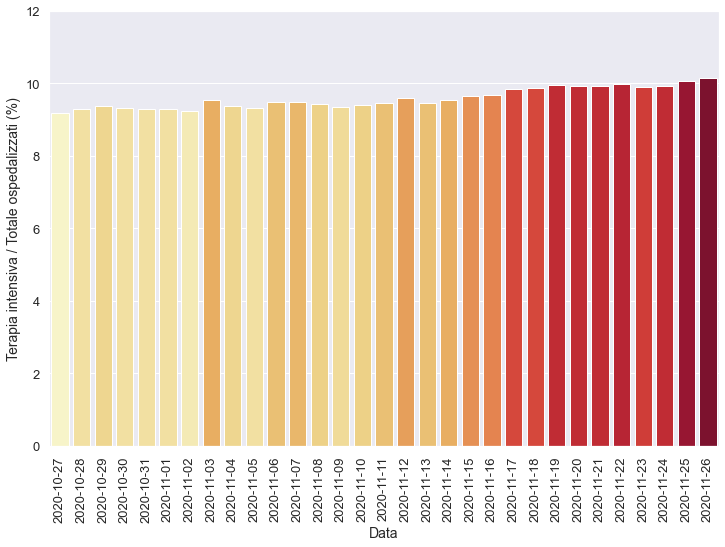

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

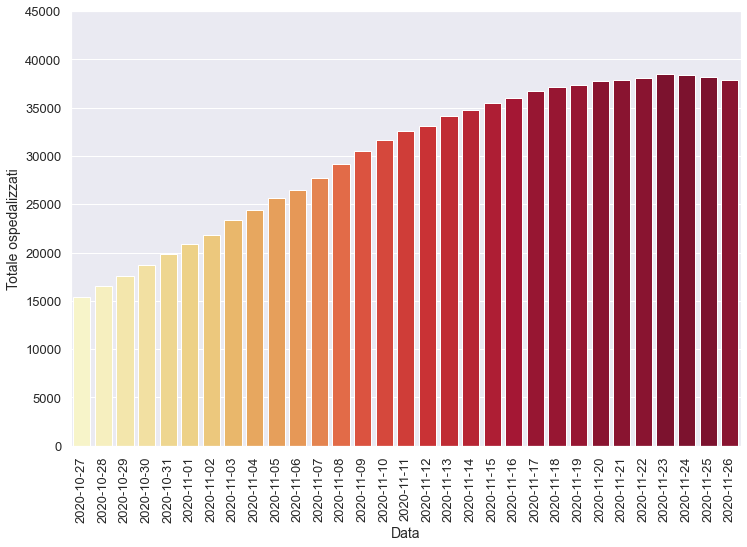

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

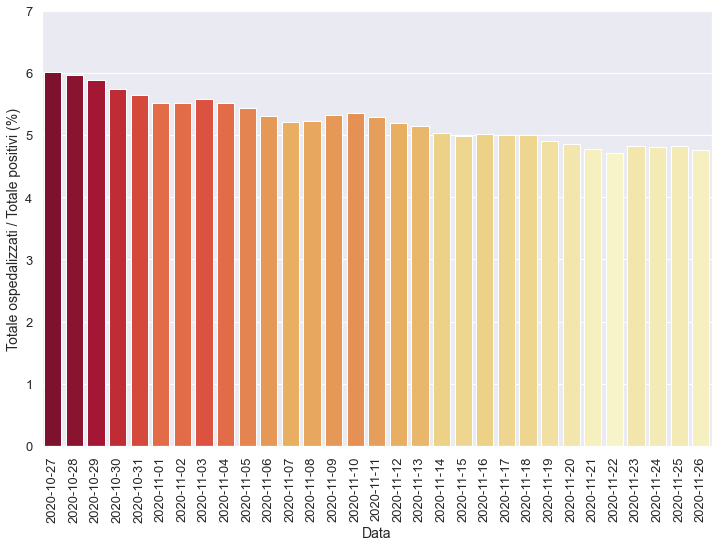

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

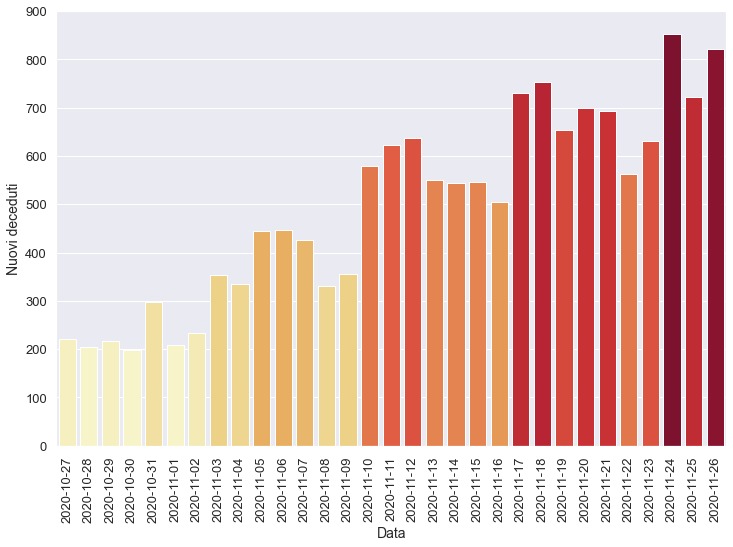

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

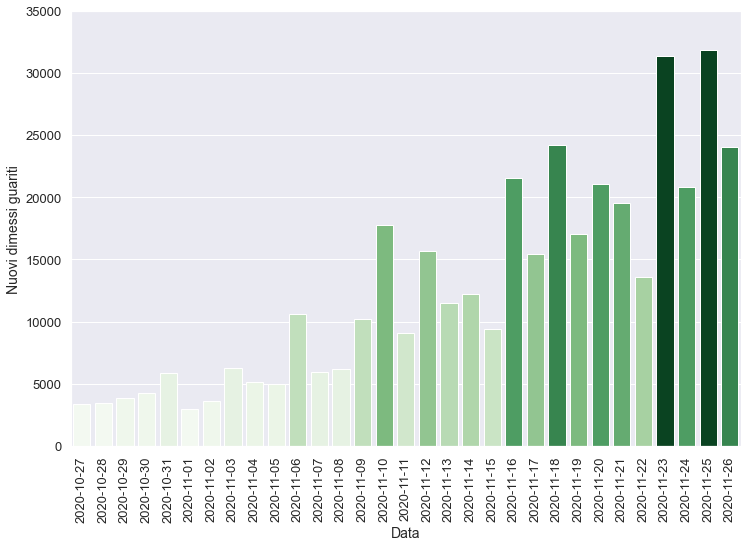

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-19T17:00:00,33610,3712,37322,724349,761671,18503,36176,498987,47870,...,17020.0,653.0,250186.0,138397.0,9.95,4.90,14.46,26.14,1.14,4.868
1,2020-11-20T17:00:00,33957,3748,37705,739471,777176,15505,37242,520022,48569,...,21035.0,699.0,238077.0,116853.0,9.94,4.85,15.64,31.87,0.97,4.890
2,2020-11-21T17:00:00,34063,3758,37821,753925,791746,14570,34767,539524,49261,...,19502.0,692.0,237225.0,121315.0,9.94,4.78,14.66,28.66,0.27,4.474
3,2020-11-22T17:00:00,34279,3801,38080,767867,805947,14201,28337,553098,49823,...,13574.0,562.0,188747.0,104861.0,9.98,4.72,15.01,27.02,1.14,3.579
4,2020-11-23T17:00:00,34697,3810,38507,758342,796849,-9098,22930,584493,50453,...,31395.0,630.0,148945.0,77855.0,9.89,4.83,15.39,29.45,0.24,2.845
5,2020-11-24T17:00:00,34577,3816,38393,759993,798386,1537,23232,605330,51306,...,20837.0,853.0,188659.0,95247.0,9.94,4.81,12.31,24.39,0.16,2.916
6,2020-11-25T17:00:00,34313,3848,38161,753536,791697,-6689,25853,637149,52028,...,31819.0,722.0,230007.0,114177.0,10.08,4.82,11.24,22.64,0.84,3.238
7,2020-11-26T17:00:00,34038,3846,37884,757961,795845,4148,29003,661180,52850,...,24031.0,822.0,232711.0,110261.0,10.15,4.76,12.46,26.30,-0.05,3.663


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

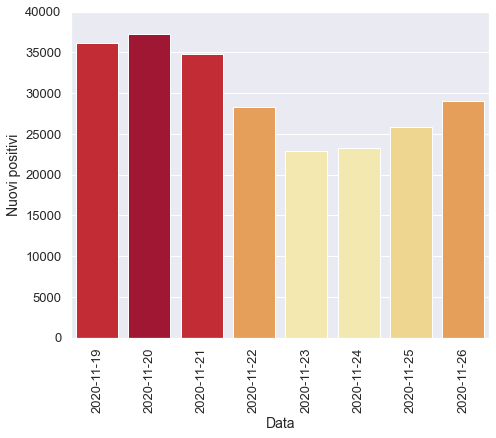

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

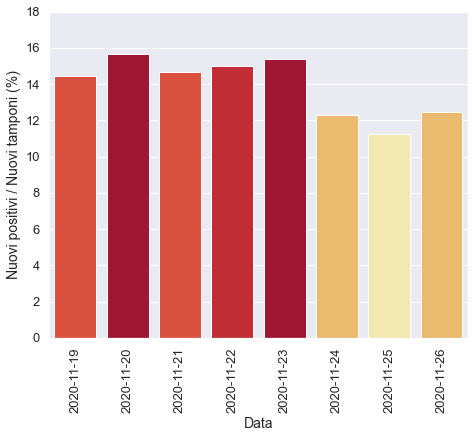

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

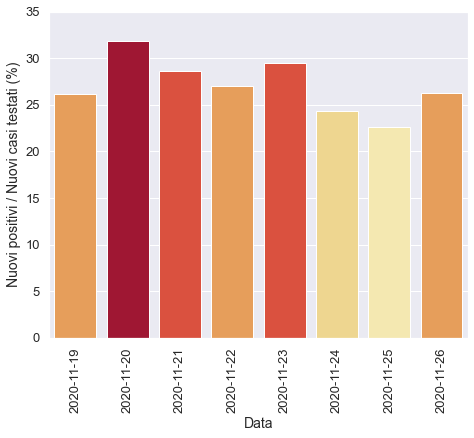

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

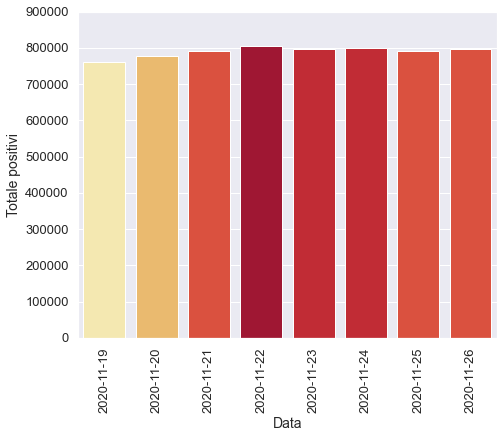

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

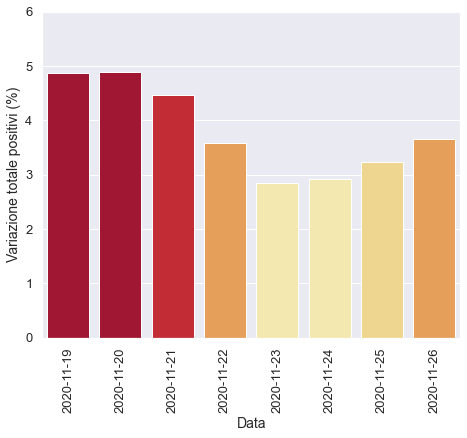

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

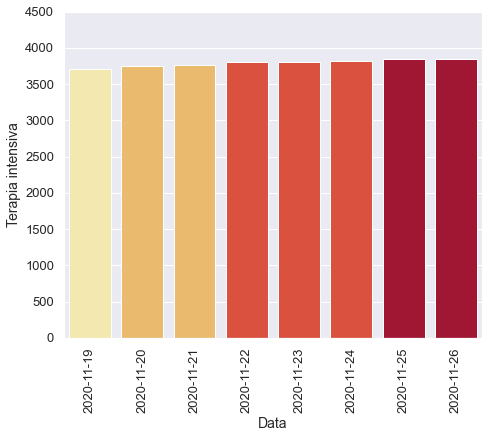

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

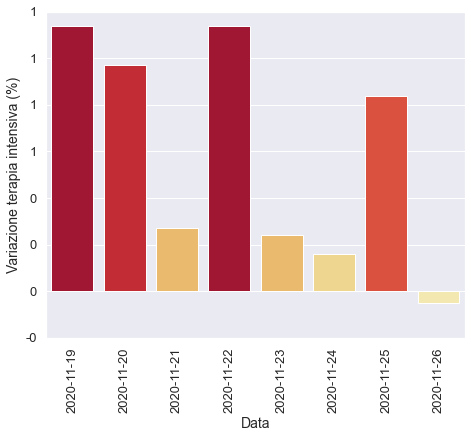

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

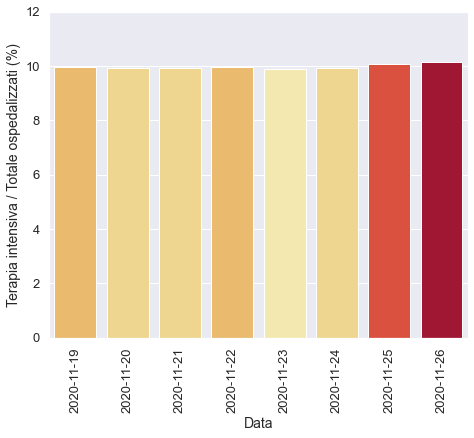

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

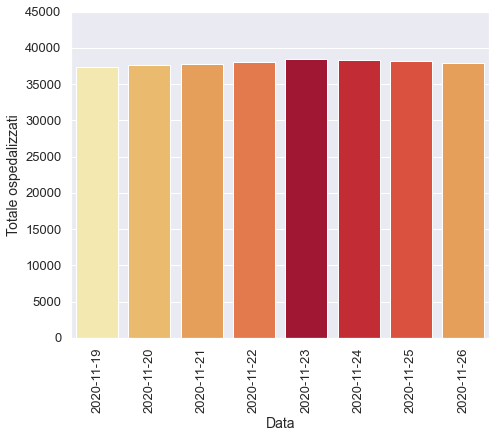

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

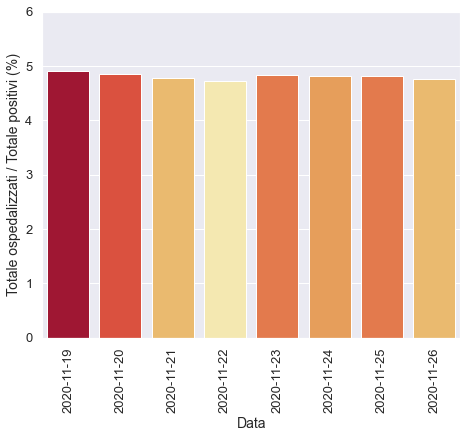

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

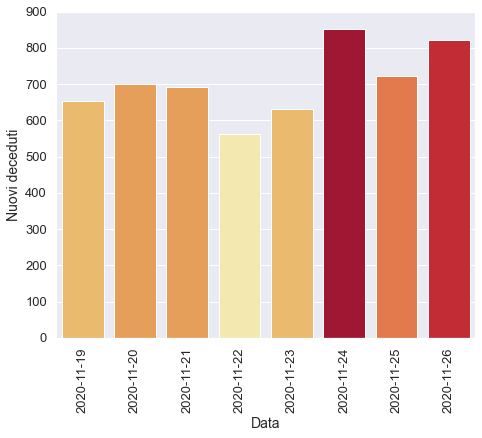

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

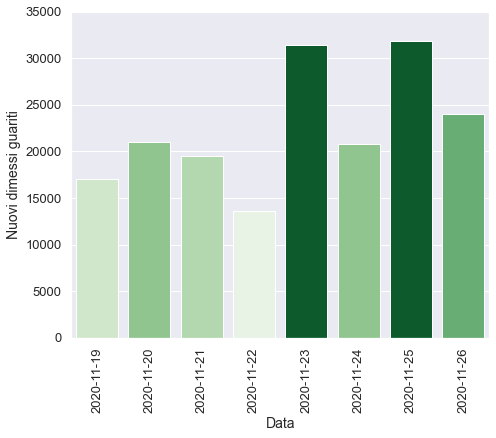

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)